In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url="https://kur.doviz.com/serbest-piyasa/sterlin"
r=requests.get(url)
#r.status_code
soup=bs(r.content,'lxml')#soup=bs(r.content,'html.parser')

l = []
data=soup.find_all('tr')
for tr in data:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
    
df=pd.DataFrame(l, columns=["Banka", "Alış","Satış"])
df=df.mask(df.eq('None')).dropna()#None değerler silinmesi
df.reset_index(inplace=True)#index değerlerin yenilenmesi

sa=[]
al=[]
for i in df.Satış:
    sa.append(float(str(i).replace(",", ".")))#çekilen verilerin tip dönüşümü
new_df1 = pd.DataFrame({'Satış':sa})   
df.update(new_df1)

for i in df.Alış:
    al.append(float(str(i).replace(",", ".")))
new_df2 = pd.DataFrame({'Alış':al}) 
df.update(new_df2)
df



,index,Banka,Alış,Satış
0,1,Akbank,7.6161,7.6193
1,2,Denizbank,7.5426,7.6633
2,3,QNB Finansbank,7.3189,7.9533
3,4,HSBC,7.635,7.655
4,5,İş Bankası,7.4016,7.8722
5,7,Merkez Bankası,7.6386,7.6784
6,8,Şekerbank,7.6215,7.6669
7,9,Vakıfbank,7.6045,7.6625
8,10,Yapıkredi,7.6012,7.6625


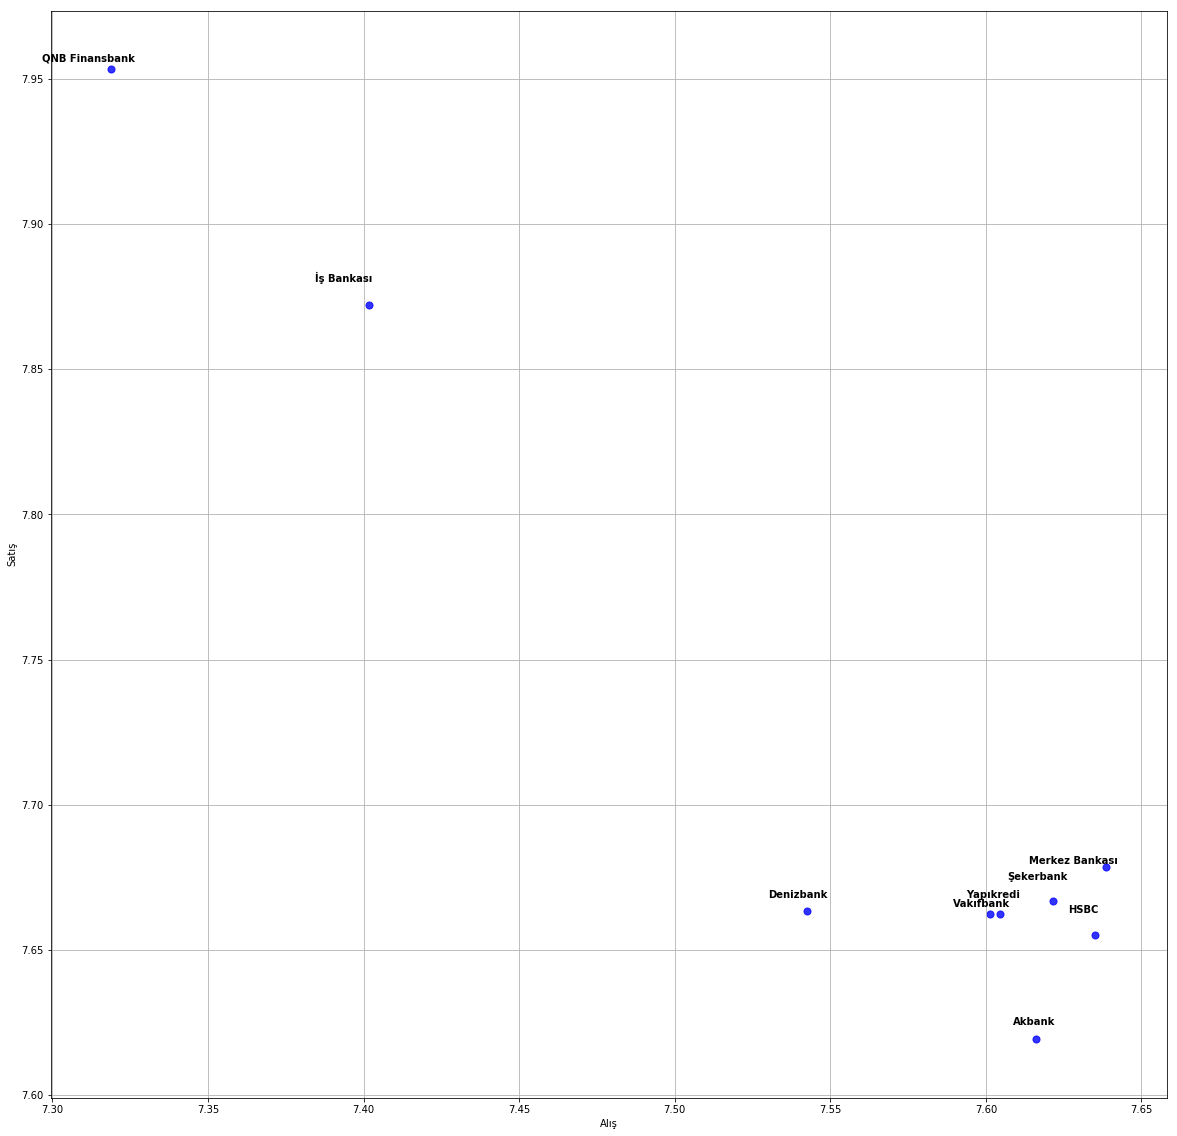

In [2]:
df[['Alış', 'Satış']] = df[['Alış', 'Satış']].apply(pd.to_numeric) 
import random
plt.figure(figsize=(20,20))
plt.grid()
p1=sns.regplot(data=df,x="Alış", y="Satış", fit_reg=False, marker="o", color="blue", scatter_kws={'s':50})
plt.xlim = (6,8)
#scatterplot grafiğine metin açıklaması ekleme
for line in range(0,df.shape[0]):
     p1.text(df.Alış[line]+random.random()/100, df.Satış[line]+random.random()/100, df.Banka[line], horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.show()

plt.scatter("Alış", "Satış", data=df,color="blue",s=100)
plt.show()